# Three Tanks: Simulation using Scipy

In [1]:
import warnings
warnings.filterwarnings("ignore")
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

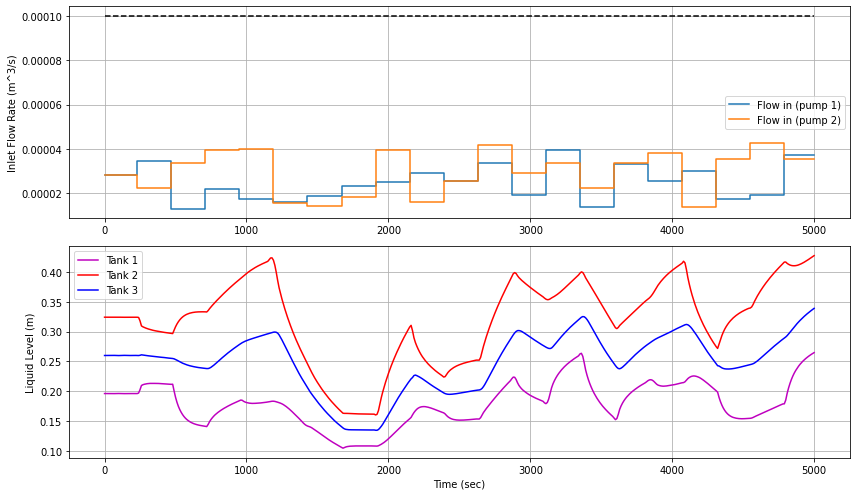

In [2]:
# Parameters
hmax = 0.62    # m, max water level
AT = 154e-4    # m^2, tank cross-sectional area
AO = 0.5e-4    # m^2, cross-sectional area of valve
AC = 0.5e-4    # m^2, cross-sectional area of connecting pipes
a0 = 0.56      # valve coefficient, outlet
ac = 0.48      # valve coefficient, connecting pipes
g = 9.81       # m/s^2
qmax = 100e-6  # m^3/s, max flow rate in

# Sampling: 1 sample every 10 sec
t_span = np.linspace(0, 5000, 501)

# Nominal conditions chosen:
x0 = np.array([0.1961, 0.3243, 0.26])  # m, tank liquid levels
u0 = 28e-6                             # m^3/s, inlet flow rates

rand_seed = 1
np.random.seed(rand_seed)
i_data = np.arange(t_span[0], t_span[-1], 240) # start, last, increment
u1 = (np.random.rand(i_data.shape[0])-0.5)*30e-6 + u0
u2 = (np.random.rand(i_data.shape[0])-0.5)*30e-6 + u0
u1[0] = u0
u2[0] = u0

def dxdt(t, x):
    pos = np.argwhere(t >= i_data)[-1]
    return [1/AT*(-AC*ac*np.sign(x[0]-x[2])*np.sqrt(2*g*np.abs(x[0]-x[2])) + u1[pos][0] - \
                  AO*a0*np.sqrt(2*g*x[0])),
            1/AT*(AC*ac*np.sign(x[2]-x[1])*np.sqrt(2*g*np.abs(x[2]-x[1])) + u2[pos][0]) - \
                  AO*a0*np.sqrt(2*g*x[1]),
            1/AT*(AC*ac*np.sign(x[0]-x[2])*np.sqrt(2*g*np.abs(x[0]-x[2]))\
                 -AC*ac*np.sign(x[2]-x[1])*np.sqrt(2*g*np.abs(x[2]-x[1])))]

sol = solve_ivp(dxdt, [t_span[0], t_span[-1]], x0, t_eval=t_span)

u1_t = u1[[np.argwhere(j >= i_data)[-1] for j in t_span]]
u2_t = u2[[np.argwhere(j >= i_data)[-1] for j in t_span]]

fig, ax = plt.subplots(2, 1, figsize=(12, 7))
ax[0].step(t_span, u1_t, label='Flow in (pump 1)')
ax[0].step(t_span, u2_t, label='Flow in (pump 2)')
ax[0].plot([t_span[0], t_span[-1]], qmax*np.array([1, 1]), 'k--')
ax[0].set_ylabel('Inlet Flow Rate (m^3/s)')
ax[0].legend()
ax[0].grid()
ax[1].plot(sol.t, sol.y[0].ravel(), 'm-',label='Tank 1')
ax[1].plot(sol.t, sol.y[1].ravel(), 'r-',label='Tank 2')
ax[1].plot(sol.t, sol.y[2].ravel(), 'b-',label='Tank 3')
ax[1].set_ylabel('Liquid Level (m)')
ax[1].set_xlabel('Time (sec)')
ax[1].legend()
ax[1].grid()

plt.tight_layout()
plt.show()

In [3]:
u1_t = u1[[np.argwhere(j >= i_data)[-1] for j in sol.t]].ravel()
u2_t = u2[[np.argwhere(j >= i_data)[-1] for j in sol.t]].ravel()

print(sol.t.shape)
print(sol.y.shape)
print(u1_t.shape)
print(u2_t.shape)

tanks_df = pd.DataFrame({'x1': sol.y[0], 'x2': sol.y[1] , 'x3':sol.y[2], 'u1':u1_t, 'u2':u2_t})
tanks_df.head(10)

(501,)
(3, 501)
(501,)
(501,)


,x1,x2,x3,u1,u2
0,0.196100,0.324300,0.260000,0.000028,0.000028
1,0.196074,0.324276,0.260044,0.000028,0.000028
2,0.196029,0.324239,0.260118,0.000028,0.000028
3,0.195965,0.324187,0.260220,0.000028,0.000028
4,0.195918,0.324149,0.260295,0.000028,0.000028
5,0.195909,0.324139,0.260312,0.000028,0.000028
6,0.195945,0.324163,0.260259,0.000028,0.000028
7,0.196020,0.324215,0.260147,0.000028,0.000028
8,0.196112,0.324281,0.260009,0.000028,0.000028
9,0.196185,0.324333,0.259900,0.000028,0.000028


In [4]:
tanks_df.to_csv(f'tanks_seed{rand_seed}_in.csv')